# <p id="1" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">1: Import Libraries</p>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection  import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import KMeans

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

import warnings
warnings.filterwarnings("ignore")

# <p id="2" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">2: Read Dataset</p>

In [23]:
data= pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43676,41605,-2.124575,0.062763,1.241179,0.314861,-1.429539,-0.257928,-0.601996,0.986393,-0.087686,...,0.347357,0.730357,-0.070482,0.600373,-0.481780,0.470592,-0.275938,-0.166828,88.00,0.0
43677,41605,1.128492,0.154872,0.425385,1.275186,-0.100392,0.140953,-0.051615,0.143311,0.059101,...,-0.054433,0.042567,-0.069599,0.033582,0.628640,-0.329126,0.035518,0.004856,5.00,0.0
43678,41605,-3.062677,3.098384,-4.751905,1.726366,-0.848178,-1.629881,-1.464473,2.601511,-0.579248,...,0.020136,-0.245436,0.081065,-0.323977,-0.263530,-0.371010,0.089257,-0.191195,1.00,0.0
43679,41606,-1.200424,-0.050464,2.319384,0.062695,-0.794518,0.764863,-0.041060,0.418438,0.345849,...,-0.126852,-0.103167,0.003841,0.087676,-0.101080,1.145146,0.163202,0.166503,120.34,0.0


In [24]:
data.shape

(43681, 31)

# <p id="3" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">3: Dataset Overview</p>

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43681 entries, 0 to 43680
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    43681 non-null  int64  
 1   V1      43681 non-null  float64
 2   V2      43681 non-null  float64
 3   V3      43681 non-null  float64
 4   V4      43681 non-null  float64
 5   V5      43681 non-null  float64
 6   V6      43681 non-null  float64
 7   V7      43681 non-null  float64
 8   V8      43681 non-null  float64
 9   V9      43681 non-null  float64
 10  V10     43681 non-null  float64
 11  V11     43681 non-null  float64
 12  V12     43681 non-null  float64
 13  V13     43681 non-null  float64
 14  V14     43681 non-null  float64
 15  V15     43681 non-null  float64
 16  V16     43681 non-null  float64
 17  V17     43681 non-null  float64
 18  V18     43680 non-null  float64
 19  V19     43680 non-null  float64
 20  V20     43680 non-null  float64
 21  V21     43680 non-null  float64
 22

In [26]:
data.isnull().sum().sum()

13

In [27]:
# Drop rows with NaN values in 'Class'
data = data.dropna(subset=['Class'])

# Verify there are no more NaN values in 'Class'
print(data['Class'].isnull().sum())

0


In [28]:
# Calculate the class distribution
class_counts = data['Class'].value_counts(normalize=True) * 100

# Print the class distribution with better formatting
print(f"No Frauds: {class_counts[0]:.2f}% of the dataset")
print(f"Frauds: {class_counts[1]:.2f}% of the dataset")

No Frauds: 99.69% of the dataset
Frauds: 0.31% of the dataset


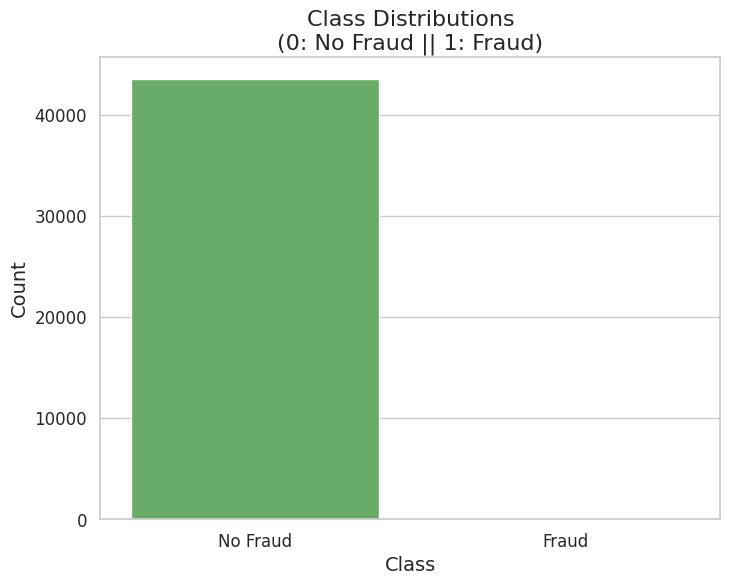

In [29]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette=['#5cb85c', '#d9534f'])

# Add titles and labels
plt.title('Class Distributions\n(0: No Fraud || 1: Fraud)', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Fraud', 'Fraud'], fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [30]:
# Create a copy of the relevant columns
tmp = data[['Amount', 'Class']].copy()

# Split the data into two series based on the 'Class' column
class_0 = tmp[tmp['Class'] == 0]['Amount']
class_1 = tmp[tmp['Class'] == 1]['Amount']

# Alternatively, you can use groupby to split the data
class_groups = tmp.groupby('Class')['Amount']
class_0 = class_groups.get_group(0)
class_1 = class_groups.get_group(1)

In [31]:
class_0.describe()

count    43546.000000
mean        90.282096
std        238.422933
min          0.000000
25%          7.580000
50%         24.900000
75%         81.400000
max       7879.420000
Name: Amount, dtype: float64

In [32]:
class_1.describe()

count     134.000000
mean       93.928433
std       231.551248
min         0.000000
25%         1.000000
50%         6.455000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

# <p id="3" style="justify-content: center; align-items: center; background-color: #FA8072; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.</p>

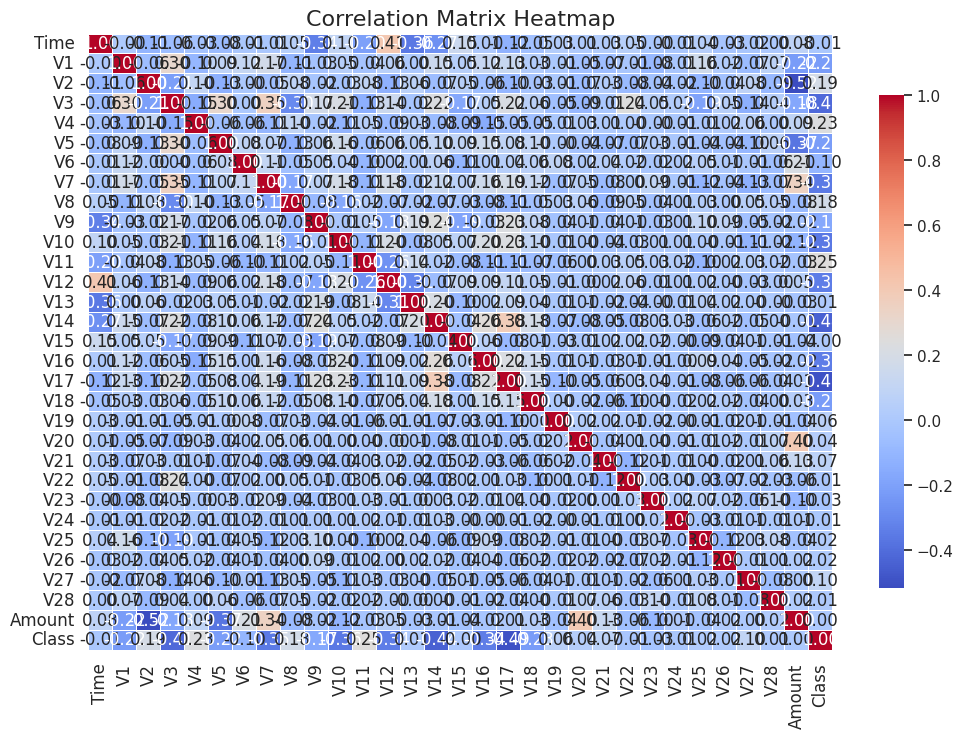

In [33]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
dataplot = sns.heatmap(data.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

# Show the plot
plt.show()

In [34]:
X = data.drop("Class", axis=1)
y = data['Class']

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame (optional, but often useful)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled DataFrame
X_scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.943114,0.801389,0.957179,0.302382,0.543337,0.546786,0.423686,0.676242,0.469358,...,0.450213,0.472136,0.616099,0.604796,0.423810,0.585545,0.252126,0.441609,0.220792,0.018989
1,0.000000,0.986831,0.805128,0.892350,0.259453,0.548514,0.535598,0.418650,0.676021,0.436596,...,0.439867,0.467297,0.552450,0.609604,0.364436,0.588512,0.315687,0.434375,0.221615,0.000341
2,0.000024,0.943139,0.787408,0.936303,0.256297,0.541195,0.574268,0.432415,0.678665,0.369970,...,0.459044,0.478347,0.650395,0.627950,0.313432,0.550510,0.262218,0.432022,0.219901,0.048057
3,0.000024,0.949857,0.800149,0.936844,0.198917,0.547600,0.562904,0.423655,0.680775,0.376722,...,0.435381,0.470037,0.597170,0.602983,0.242451,0.625391,0.245505,0.438014,0.222690,0.015674
4,0.000048,0.946568,0.811875,0.930162,0.257371,0.542442,0.539259,0.429275,0.670238,0.493377,...,0.455286,0.472343,0.652242,0.604184,0.434661,0.559851,0.391635,0.445967,0.226226,0.008883


In [36]:
X_scaled

array([[0.00000000e+00, 9.43114320e-01, 8.01389180e-01, ...,
        4.41609368e-01, 2.20791504e-01, 1.89887073e-02],
       [0.00000000e+00, 9.86831151e-01, 8.05128240e-01, ...,
        4.34375000e-01, 2.21614617e-01, 3.41395686e-04],
       [2.40349950e-05, 9.43139215e-01, 7.87407559e-01, ...,
        4.32021612e-01, 2.19901175e-01, 4.80568367e-02],
       ...,
       [9.99975965e-01, 9.85745540e-01, 8.03900622e-01, ...,
        4.36633551e-01, 2.21387585e-01, 6.34564473e-04],
       [9.99975965e-01, 9.13939611e-01, 8.36373138e-01, ...,
        4.39360942e-01, 2.16877115e-01, 1.26912895e-04],
       [1.00000000e+00, 9.45844979e-01, 8.01635375e-01, ...,
        4.43113878e-01, 2.25106530e-01, 1.52726977e-02]])

In [37]:
from sklearn.model_selection import train_test_split

# Define the parameters for train_test_split
test_size = 0.2
random_state = 42
stratify = y

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=stratify)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (34944, 30)
X_test shape: (8736, 30)
y_train shape: (34944,)
y_test shape: (8736,)


In [38]:
# Decrease the number of nearest neighbors to 2
smote = SMOTE(random_state=0, k_neighbors=2)

# Fit SMOTE only on the training data and resample
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the shapes of the resulting datasets
print(f"Original X_train shape: {X_train.shape}")
print(f"Resampled X_train shape: {X_train_resampled.shape}")

Original X_train shape: (34944, 30)
Resampled X_train shape: (69674, 30)


In [39]:
print(f"Original y_train distribution:\n{y_train.value_counts()}")
print(f"Resampled y_train distribution:\n{y_train_resampled.value_counts()}")

Original y_train distribution:
Class
0.0    34837
1.0      107
Name: count, dtype: int64
Resampled y_train distribution:
Class
0.0    34837
1.0    34837
Name: count, dtype: int64


In [40]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test distribution:\n{y_test.value_counts()}")

X_test shape: (8736, 30)
y_test distribution:
Class
0.0    8709
1.0      27
Name: count, dtype: int64


In [41]:
def evaluate(model):
    # Fit the model on the training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print model and evaluation metrics
    print(model)
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

# Example usage:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(random_state=42)
# evaluate(model)

LogisticRegression(max_iter=1000, random_state=42)


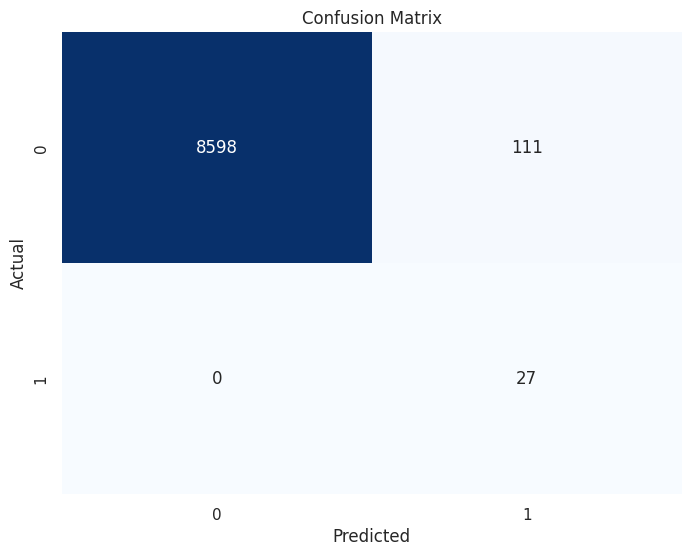

LogisticRegression(max_iter=1000, random_state=42)
Accuracy: 0.9873
Recall: 1.0000
F1 Score: 0.3273


In [42]:
# Initialize Logistic Regression model with standard configuration
model_LR = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)

# Display the model configuration
print(model_LR)

# Example usage with the evaluate function
evaluate(model_LR)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Tuned hyperparameters (best parameters): {'C': 1.0, 'penalty': 'l2'}
Best ROC AUC score: 0.9990587160968903


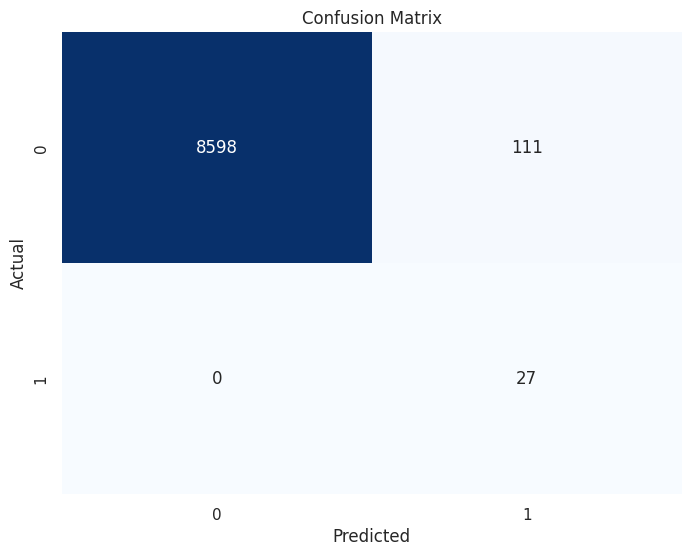

LogisticRegression(max_iter=1000, random_state=42)
Accuracy: 0.9873
Recall: 1.0000
F1 Score: 0.3273


In [43]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    "C": np.logspace(-3, 3, 7),
    "penalty": ["l2"]  # l2 is the ridge penalty
}

# Initialize the Logistic Regression model
model_LR = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)

# Initialize GridSearchCV with 3-fold cross-validation and scoring based on ROC AUC
clf_lsr_cv = GridSearchCV(model_LR, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit the model using the resampled training data
clf_lsr_cv.fit(X_train_resampled, y_train_resampled)

# Display the best parameters and the corresponding score
print("Tuned hyperparameters (best parameters):", clf_lsr_cv.best_params_)
print("Best ROC AUC score:", clf_lsr_cv.best_score_)

# Evaluate the best model on the test data
best_model = clf_lsr_cv.best_estimator_
evaluate(best_model)

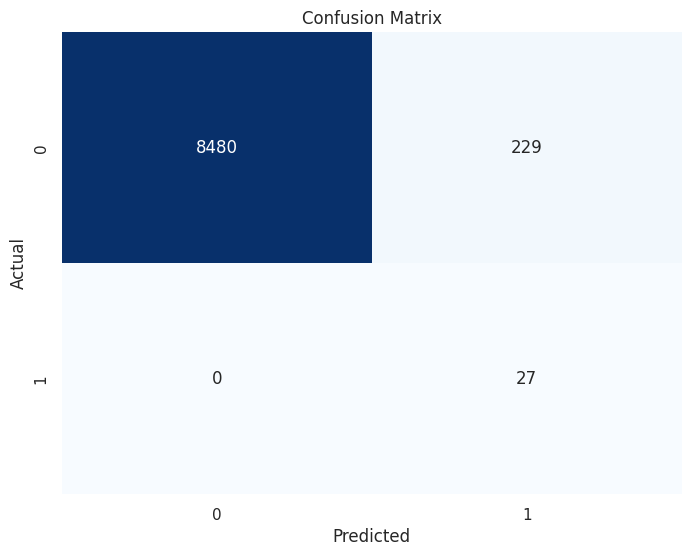

LogisticRegression(C=1000.0, random_state=42)
Accuracy: 0.9738
Recall: 1.0000
F1 Score: 0.1908


In [44]:
# Fitting the model with best parameters .

lsr_best = LogisticRegression(penalty='l2',C=1000.0,random_state = 42)
lsr_clf = lsr_best.fit(X_train,y_train)
evaluate(lsr_clf)

KNeighborsClassifier()


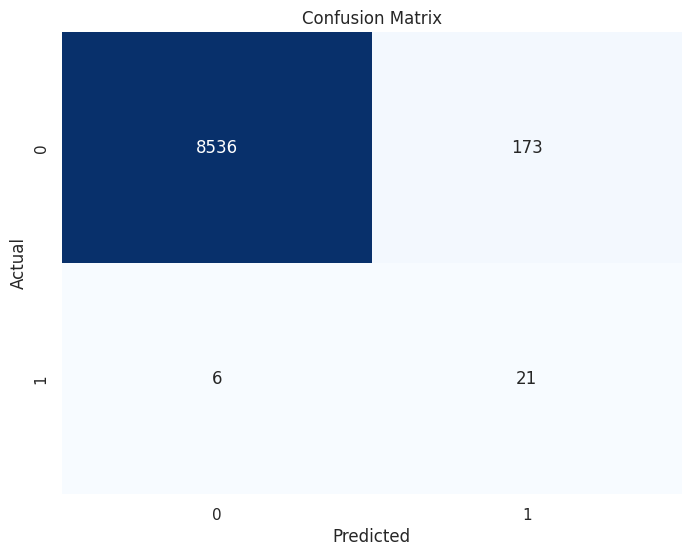

KNeighborsClassifier()
Accuracy: 0.9795
Recall: 0.7778
F1 Score: 0.1900


In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize K-Nearest Neighbors model with standard configuration
model_KNN = KNeighborsClassifier(n_neighbors=5, algorithm='auto')

# Display the model configuration
print(model_KNN)

# Example usage with the evaluate function
evaluate(model_KNN)

In [46]:
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
for k in k_range:
  model_KNN  = KNeighborsClassifier(n_neighbors=k)
  model_KNN .fit(X_train,y_train)
  score = cross_val_score(model_KNN , X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]

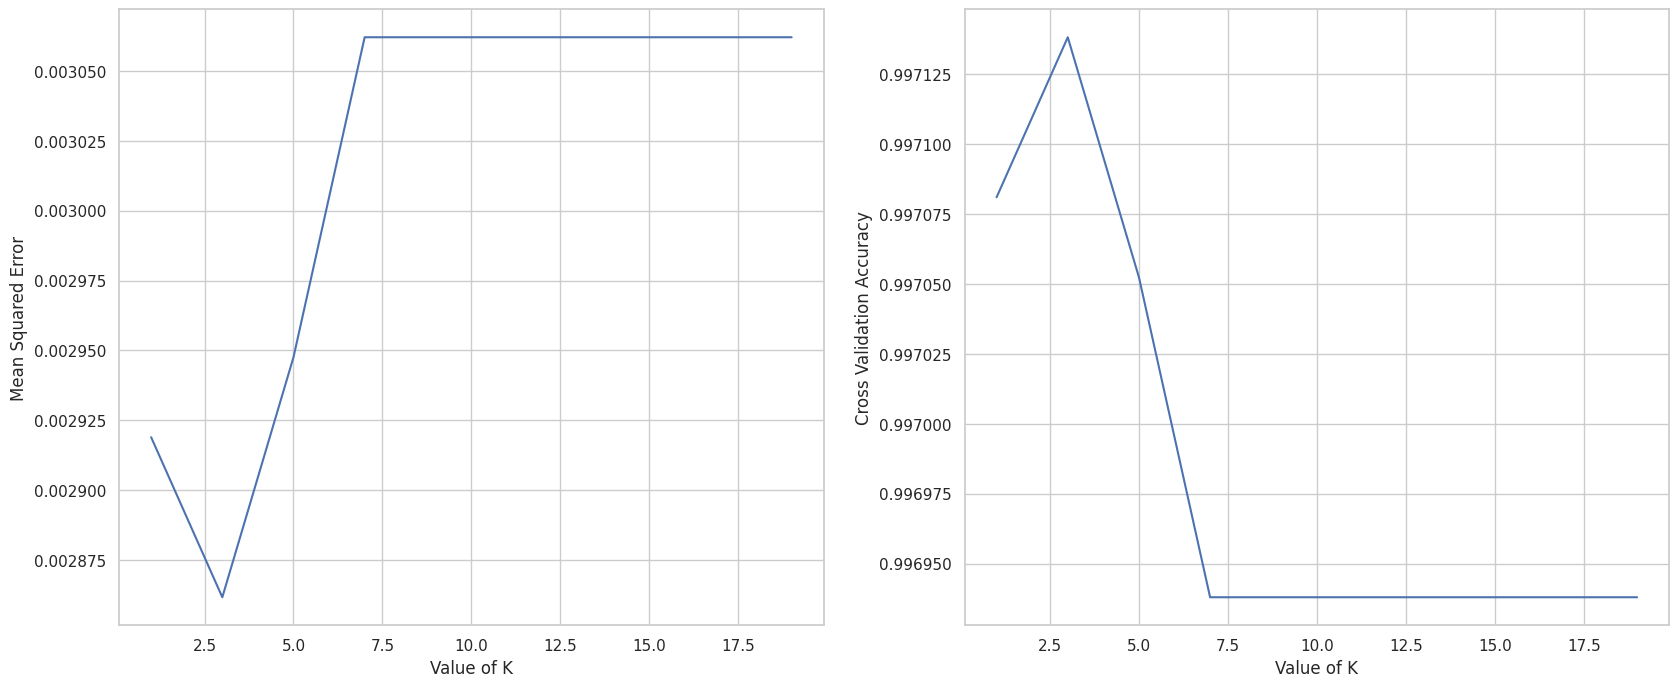

In [47]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(x=k_range,y=mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(x=k_range,y=scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()

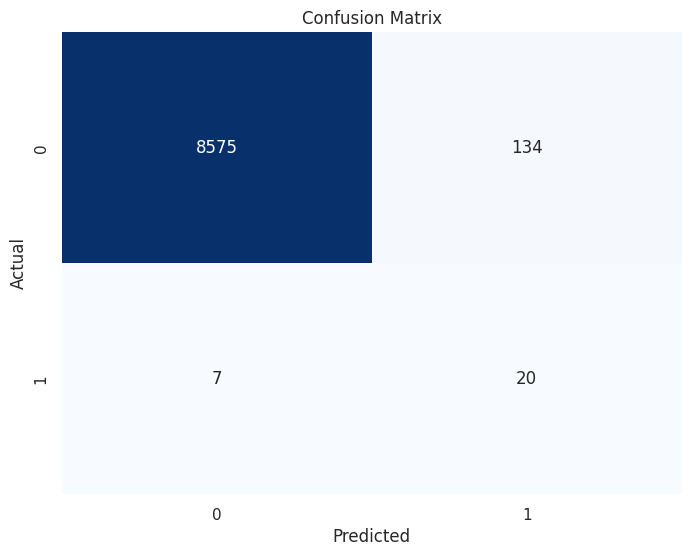

KNeighborsClassifier(n_neighbors=3)
Accuracy: 0.9839
Recall: 0.7407
F1 Score: 0.2210


In [48]:
knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)

evaluate(knn_clf)

In [49]:
model_RFC = RandomForestClassifier()

In [50]:
# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
clf_rfc_cv = GridSearchCV(model_RFC, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 4, 'n_estimators': 40}
accuracy : 0.9896252648229185


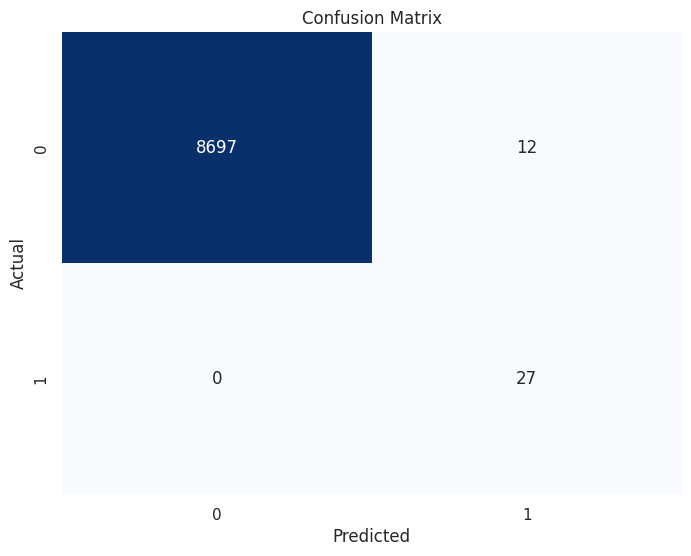

RandomForestClassifier(max_depth=9, n_estimators=50)
Accuracy: 0.9986
Recall: 1.0000
F1 Score: 0.8182


In [51]:
#Fitting model

rf = RandomForestClassifier(max_depth=9, n_estimators=50)
RFC_clf = rf.fit(X_train,y_train)

evaluate(RFC_clf)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Initialize the ANN model
model_ANN = Sequential()

# Add input layer and first hidden layer
model_ANN.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

# Add additional hidden layers
model_ANN.add(Dense(16, activation='relu'))
model_ANN.add(Dense(8, activation='relu'))

# Add output layer
model_ANN.add(Dense(1, activation='sigmoid'))

# Compile the model with optimizer, loss function, and evaluation metric
model_ANN.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model_ANN.summary()

# Example usage: fit the model on training data
history = model_ANN.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
loss, accuracy = model_ANN.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
1742/1742 [==============================] - 5s 2ms/step - loss: 32.1489 - accuracy: 0.8041 - val_loss: 6.7430 - val_accuracy: 0.7636
Epoch 2/50


In [53]:
y_pred = model_ANN.predict(X_test)
y_pred = (y_pred > 0.5)

273/273 [==============================] - 1s 2ms/step


In [54]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n       False       0.99      1.00      1.00      8647\n        True       1.00      0.30      0.47        89\n\n    accuracy                           0.99      8736\n   macro avg       1.00      0.65      0.73      8736\nweighted avg       0.99      0.99      0.99      8736\n'

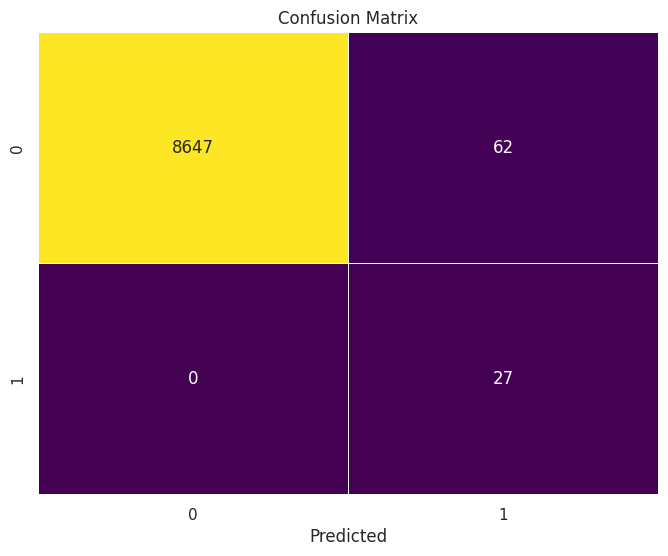

In [55]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.show()

In [56]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [57]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43675,41604,-1.122879,-0.982798,1.962819,-0.445614,0.284100,-1.145878,-0.619870,0.235603,0.991206,...,0.153640,0.013340,-0.148627,0.356052,0.412066,-0.933660,0.671563,0.077405,0.205302,31.61
43676,41605,-2.124575,0.062763,1.241179,0.314861,-1.429539,-0.257928,-0.601996,0.986393,-0.087686,...,-0.344862,0.347357,0.730357,-0.070482,0.600373,-0.481780,0.470592,-0.275938,-0.166828,88.00
43677,41605,1.128492,0.154872,0.425385,1.275186,-0.100392,0.140953,-0.051615,0.143311,0.059101,...,-0.197532,-0.054433,0.042567,-0.069599,0.033582,0.628640,-0.329126,0.035518,0.004856,5.00
43678,41605,-3.062677,3.098384,-4.751905,1.726366,-0.848178,-1.629881,-1.464473,2.601511,-0.579248,...,0.053318,0.020136,-0.245436,0.081065,-0.323977,-0.263530,-0.371010,0.089257,-0.191195,1.00


In [60]:
from sklearn.metrics import silhouette_score
# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.7338


In [61]:
# Visualize the clustering results if the data is 2D
if X.shape[1] == 2:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='viridis', legend='full')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
    plt.title('KMeans Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Display the cluster centers
print('Cluster Centers:\n', kmeans.cluster_centers_)

Cluster Centers:
 [[ 3.40911232e+04 -2.39792757e-01 -6.33231907e-02  6.29099349e-01
   1.57400363e-01 -3.02457225e-01  8.36709299e-02 -1.13326283e-01
   8.91652775e-02 -1.15921921e-01  1.62556096e-02  2.39870542e-01
  -1.22955647e-02 -7.56573592e-02 -2.17328327e-02  2.16049072e-01
  -2.55933018e-03  3.09646086e-02 -1.25480451e-01 -1.37773199e-02
   5.79249602e-02 -1.33271872e-02 -9.34932877e-02 -4.24195066e-02
   7.12465902e-03  1.47918731e-01  9.09781010e-03  6.01727872e-03
   7.00639908e-03  1.01191292e+02]
 [ 8.20934585e+03 -2.16756847e-01  2.78392546e-01  8.85820560e-01
   2.81256521e-01 -9.04896882e-02  1.39736613e-01 -1.28951474e-01
  -4.60513191e-02  9.24759629e-01 -2.96209326e-01  8.26034527e-01
  -1.45431101e+00  9.42920677e-01  7.87253116e-01 -1.78410534e-01
  -2.93722517e-02  3.80501898e-01 -1.93291803e-02 -6.70402602e-02
   2.17939755e-02 -6.18184246e-02 -1.53057763e-01 -3.36790138e-02
   1.67330668e-02  1.06530886e-01  5.78771258e-02  9.10761570e-03
   1.84457866e-04  6.20

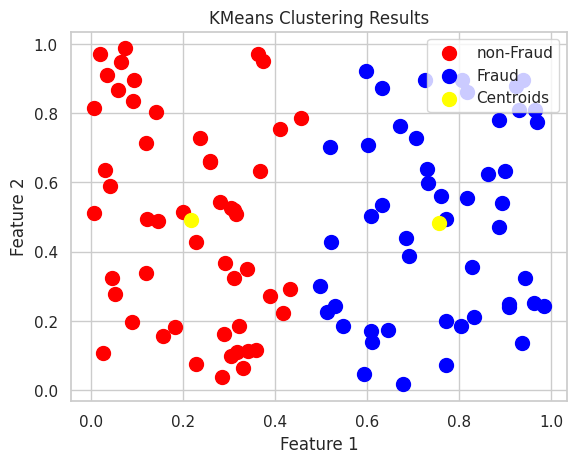

In [72]:
# Creating dummy data for demonstration
# Replace this with your actual data
np.random.seed(42)
X = np.random.rand(100, 2)  # Example data, replace with your dataset

# Performing KMeans clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s=100, c='red', label='non-Fraud')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s=100, c='blue', label='Fraud')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='yellow', label='Centroids')

# Adding legend and showing the plot
plt.legend(loc='upper right')
plt.title('KMeans Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()